In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Load Your Dataset

In [3]:
file_path = r"C:\Users\GURU\Downloads\Association Rules\Association Rules\Online retail.xlsx"

In [4]:
df = pd.read_excel(file_path)
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [6]:
df.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

In [7]:
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [8]:
# Check the column names
print(df.columns)

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')


In [9]:
# Rename the column to 'items'
df.columns = ['items']

In [10]:
# Data Preprocessing

# Drop missing values
df.dropna(inplace=True)

In [11]:
# Now, each row in 'items' is a comma-separated string, let's convert it into a list of items
df['items'] = df['items'].apply(lambda x :x.split(',') if isinstance(x, str) else x)

In [12]:
df['items']

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7497                                            [chicken]
7498                                [escalope, green tea]
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: items, Length: 7500, dtype: object

In [13]:
# Check the first few rows to ensure the conversion
print(df.head())

                                               items
0                         [burgers, meatballs, eggs]
1                                          [chutney]
2                                  [turkey, avocado]
3  [mineral water, milk, energy bar, whole wheat ...
4                                   [low fat yogurt]


In [14]:
# Transform Data for Apriori
# One-hot encoding

In [15]:
# Transform the list of items into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(df['items']).transform(df['items'])

In [16]:
# Create a DataFrame with the one-hot encoded items
onehot_df = pd.DataFrame(te_ary, columns=te.columns_)

In [17]:
# Apply Apriori Algorithm

In [18]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(onehot_df, min_support = 0.01, use_colnames = True)

In [19]:
# Generate the Association Rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.1)

In [20]:
# Display the generated rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,1.0,0.003556,1.015680,0.407144,0.044103,0.015438,0.196753
1,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
2,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,1.0,0.004398,1.058068,0.420154,0.073129,0.054881,0.136473
3,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,1.0,0.004398,1.063185,0.417349,0.073129,0.059430,0.136473
4,(burgers),(chocolate),0.087200,0.163867,0.017067,0.195719,1.194377,1.0,0.002777,1.039603,0.178291,0.072934,0.038094,0.149934


In [21]:
# Filter the rules with a minimum support of 0.01, confidence of 0.5, and lift greater than 1
filtered_rules = rules[(rules['support'] >= 0.01) &
                       (rules['confidence'] >= 0.5) &
                       (rules ['lift'] >= 1)]

In [22]:
# Display the filtered rules
print(filtered_rules[['antecedents','consequents','support','confidence','lift']].head())

             antecedents      consequents   support  confidence      lift
370  (eggs, ground beef)  (mineral water)  0.010133    0.506667  2.126469
407  (ground beef, milk)  (mineral water)  0.011067    0.503030  2.111207


In [23]:
# Visualization:

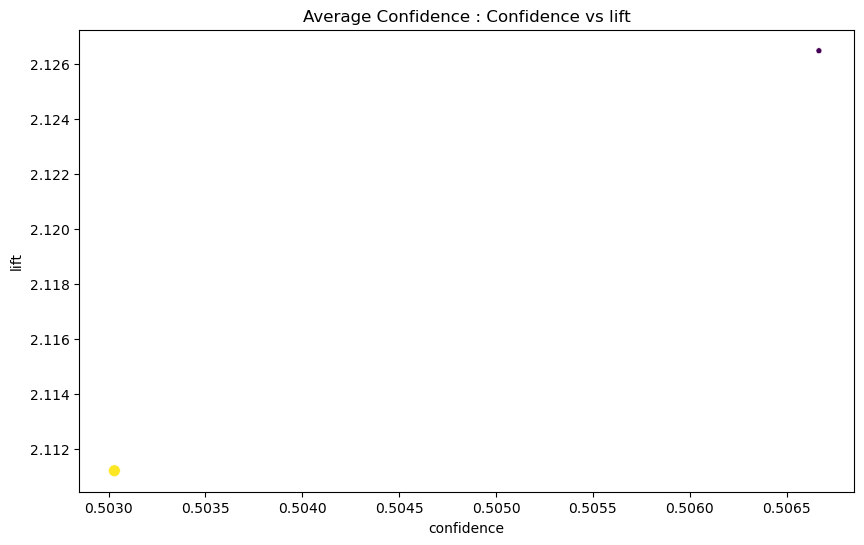

In [24]:
#Visualize Confidence vs Lift
plt.figure(figsize = (10, 6))
sns.scatterplot(data= filtered_rules, x ='confidence',y='lift',size='support',hue='support',palette = 'viridis',legend=None)
plt.title("Average Confidence : Confidence vs lift")
plt.xlabel("confidence")
plt.ylabel("lift")
plt.show()

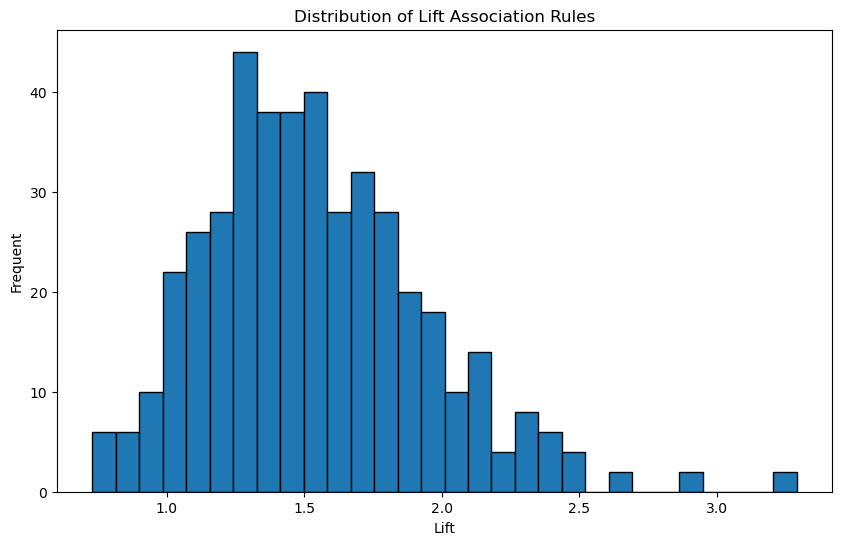

In [25]:
plt.figure(figsize = (10, 6))
plt.hist(rules['lift'], bins = 30, edgecolor = 'black')
plt.title('Distribution of Lift Association Rules')
plt.xlabel('Lift')
plt.ylabel('Frequent')
plt.show()


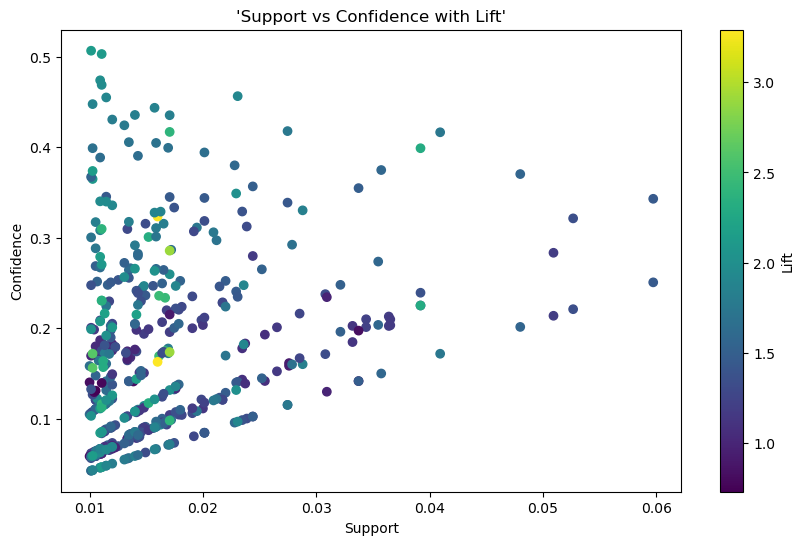

In [26]:
plt.figure(figsize = (10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title("'Support vs Confidence with Lift'")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [27]:
# Interpreting Association Rules in Natural Language
for idx, row in filtered_rules.iterrows():
    antecedents = ','.join(list(row['antecedents']))
    consequents = ','.join(list(row['consequents']))
    print(f"If a customer buys [{antecedents}], they are {round(row['confidence']*100,2)}% likely to buy [{consequents}] with a lift of {round(row['lift'], 2)}.")

If a customer buys [eggs,ground beef], they are 50.67% likely to buy [mineral water] with a lift of 2.13.
If a customer buys [ground beef,milk], they are 50.3% likely to buy [mineral water] with a lift of 2.11.


In [28]:
#Analysis and Interpretation:

#Popular Combos: Items like milk, eggs, and mineral water are often bought together.

#Strong Confidence: Buying one item increases the chance of buying another (e.g., 50%+ for some combos).

#Useful for Business: These patterns help in making bundle offers and product recommendations.
    
#Strong connection — buying one item makes another more likely to be bought.

In [29]:
## Interview Questions:-

In [30]:
#1. What is Lift and why is it important in Association Rules?
#Lift measures how much more likely two items are to be bought together than if they were independent.

# Importance:

#Lift > 1: Positive correlation (A and B occur together more often than expected).

#Lift = 1: A and B are independent.

#Lift < 1: Negative correlation.

In [31]:
#2. What is Support and Confidence? How do you calculate them?
#Support: How frequently an item or itemset appears in the dataset.

# Formula:     Support(A)= Transactions containing A / Total Transactions

#Confidence: How often B is purchased when A is purchased.

# Formula:    Confidence(A - B) = Support(AandB)  / Support(A)
 

In [32]:
#3. What are some limitations or challenges of Association Rules Mining?
  # Limitations:

#Too many rules: Can generate thousands of rules, many of which may be uninteresting.

#No causation: A - B doesn't mean A causes B.

#Rare item problem: Rare but important items might be missed due to low support.

#Scalability: Performance drops with large datasets.